data from http://jmcauley.ucsd.edu/data/tradesy/

inception-v3  model: http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz  
https://arxiv.org/pdf/1409.4842.pdf

In [1]:
from glob import glob
import numpy as np
from tqdm import tqdm_notebook as tqdm
import scipy
import scipy.spatial
import operator
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgs = glob(os.path.join("./images", "*.jpg"))
imgs = np.sort(imgs)
len(imgs)

12442

In [3]:
import scipy.misc
def imread(path):
    return scipy.misc.imread(path).astype(np.float)

In [4]:
#imgs = imgs[:100]

In [5]:
import tensorflow as tf

IMG_DIR = './images'
MODEL_PATH = './classify_image_graph_def.pb'

with tf.gfile.FastGFile(MODEL_PATH, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    pool3 = sess.graph.get_tensor_by_name('pool_3:0')
    features = []
    for img in tqdm(imgs):
        image_data = tf.gfile.FastGFile(img, 'rb').read()
        pool3_features = sess.run(pool3,{'DecodeJpeg/contents:0': image_data})
        features.append(np.squeeze(pool3_features))

In [7]:
len(features[0])

2048

In [8]:
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(features, metric="cosine"))

In [9]:
def similar_to(img_id, num=5, distance=False):
    img = pairwise[img_id]
    ids = np.argsort(img)[0: num] 
    if distance:
        dist = np.sort(img)[0: num]
        return [(x,y) for x, y in zip(ids, dist)]
    else:
        return ids

def show_sim_image(img_id):
    id_list = similar_to(img_id, distance=True)
    fig, axs = plt.subplots(1, len(id_list), figsize=(20, 3))
    for i, id in enumerate(id_list):
        print(id)
        img =imread(imgs[id[0]])
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

(0, 0.0)
(7153, 0.12279381573876591)
(8014, 0.13500018653848567)
(9106, 0.13541258116692834)
(6146, 0.14085609342547334)


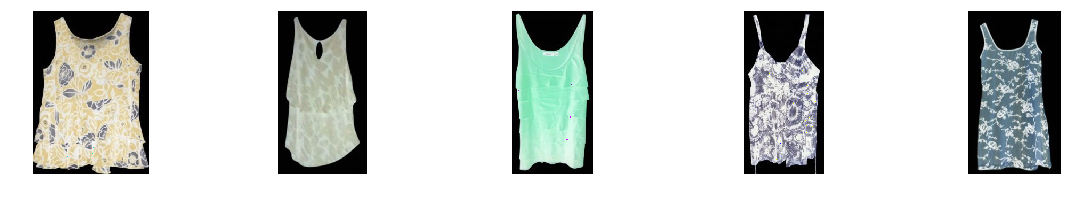

In [10]:
show_sim_image(0)

(1, 0.0)
(7211, 0.13131112961653812)
(11624, 0.14822943225476315)
(467, 0.15053781764504681)
(5607, 0.15132904954710003)


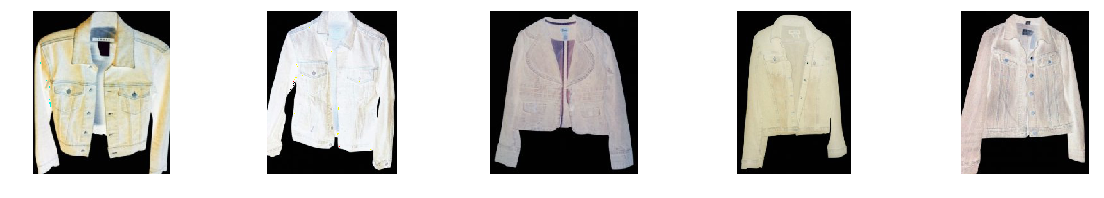

In [11]:
show_sim_image(1)

(2, 0.0)
(5210, 0.12924970873983099)
(3757, 0.14448549127894028)
(4440, 0.14586236630442206)
(11000, 0.14755490005959793)


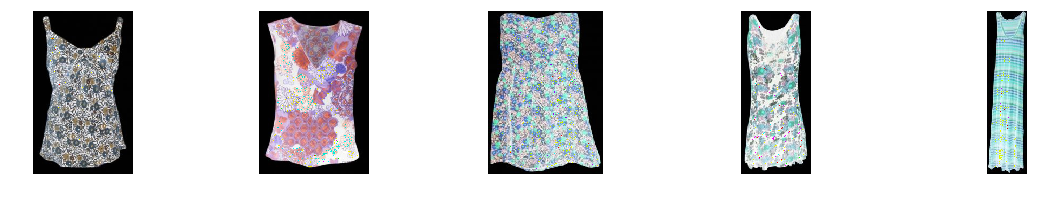

In [12]:
show_sim_image(2)

(3, 0.0)
(6635, 0.13135476667096135)
(5971, 0.13621343439940981)
(10050, 0.13707403928188255)
(8039, 0.13856092042451651)


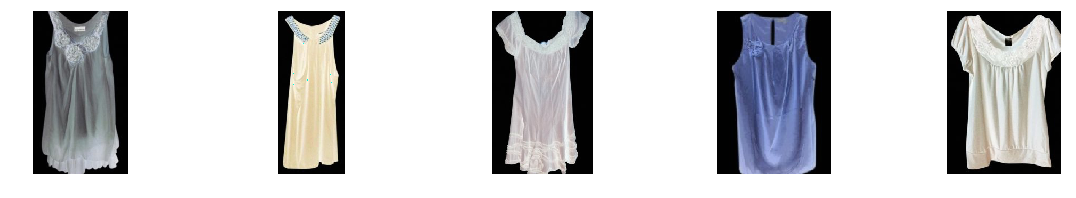

In [13]:
show_sim_image(3)